<a href="https://colab.research.google.com/github/moeed17/Signal_Analysis/blob/main/Audio_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Adversarial Audio Examples Analysis**

The following cells executes a simple code to perform a signal anlaysis on audio signal before and after perturbation. The audio files or wav files used here are taken from Nicolas Carlini's website of his work on imperceptible audio adversarial attacks.
Link to his website: https://nicholas.carlini.com/code/audio_adversarial_examples

In [83]:
pip install librosa


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [139]:
import numpy as np 
import librosa
import librosa.display

import matplotlib.pyplot as plt
from matplotlib import style

import IPython.display as ipd

import scipy
from scipy import stats
from scipy.fft import fft, fftfreq
from scipy.io import wavfile

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
%cd /content/drive/MyDrive/audio files
!cp -r '/content/drive/MyDrive/audio files/.' '/content/drive/MyDrive/Audio_Analysis'

/content/drive/.shortcut-targets-by-id/1LX9G5fBhdhaq3BPGN1b83ivdgWQCiw8Z/audio files


In [87]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [88]:
#setting the style of background for audio signal
plt.style.use('seaborn-dark-palette')

In [89]:
clean_audio_data = '/content/drive/MyDrive/Audio_Analysis/20db_clean.wav'
Clean_Data , sr = librosa.load(clean_audio_data)
print(Clean_Data, sr)

Clean_Data,sr = librosa.load(clean_audio_data, sr=None)

print(sr)

[0. 0. 0. ... 0. 0. 0.] 22050
16000


In [90]:
# function to convert the information into 
# some readable format
def output_duration(length):
    hours = length // 3600  # calculate in hours
    length %= 3600
    mins = length // 60  # calculate in minutes
    length %= 60
    seconds = length  # calculate in seconds
  
    return hours, mins, seconds
  
# sample_rate holds the sample rate of the wav file
# in (sample/sec) format
# data is the numpy array that consists
# of actual data read from the wav file
sample_rate, data = wavfile.read('/content/drive/MyDrive/Audio_Analysis/20db_clean.wav')
  
len_data = len(data)  # holds length of the numpy array
  
t = len_data / sample_rate  # returns duration but in floats
  
hours, mins, seconds = output_duration(int(t))
print('Total Duration: {}:{}:{}'.format(hours, mins, seconds))

Total Duration: 0:0:3


# ***Clean Audio Analysis***

In [91]:
ipd.Audio(clean_audio_data)

Text(0.5, 1.0, 'Clean Audio Wave')

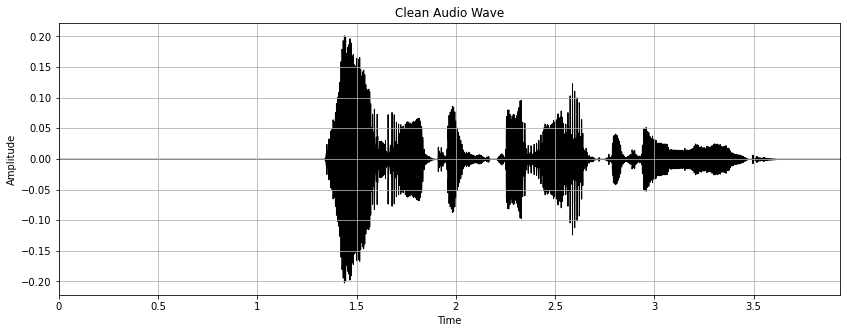

In [92]:
%matplotlib inline
plt.figure(figsize=(14, 5))
librosa.display.waveplot(Clean_Data, sr=sr, color="black")
plt.ylabel("Amplitude")
plt.grid()
plt.title('Clean Audio Wave')

In [93]:
zero_crossings = librosa.zero_crossings(Clean_Data, pad=False)
print (sum(zero_crossings))

5022


The Frequency Resolution is  0.2540650406504065
Maximum or last frequency bins is = 16000


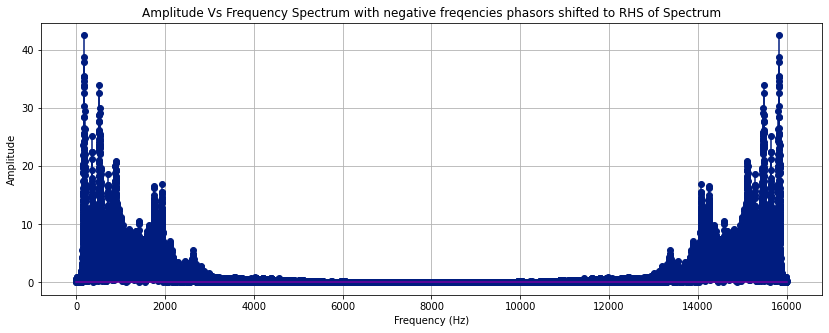

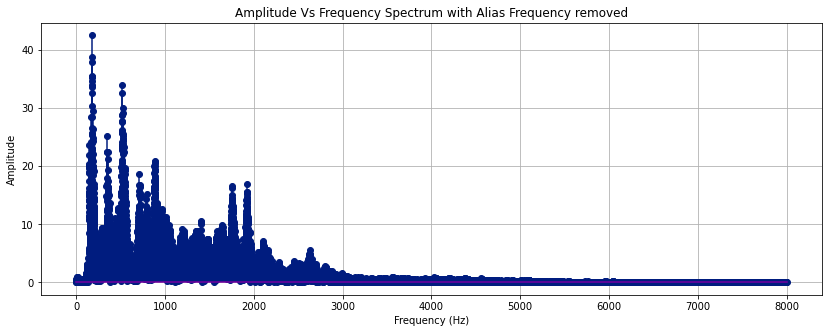

In [141]:
Clean_Dataft=fft(Clean_Data)
N = len(Clean_Dataft)
k = np.arange(1,N+1)

resolution=sr/N
print("The Frequency Resolution is ", resolution)

freq = (k*sr)/N 
#max_freq=freq.max()
#print("The max frequency present is ", max_freq)
print("Maximum or last frequency bins is =",int(freq[-1]))


#Plotting the spectrum with Aliased Frequencies/Negative Frequencies on RHS
#of the spectrum

plt.figure(figsize=(14, 5))
plt.stem(freq, np.abs(Clean_Dataft))
plt.xlabel("Frequency (Hz)"), plt.ylabel("Amplitude")
plt.title('Amplitude Vs Frequency Spectrum with negative freqencies phasors shifted to RHS of Spectrum')
plt.grid()
plt.show()

#Removing the aliased portion of spectrum

plt.figure(figsize=(14, 5))
plt.stem(freq[:int(len(freq)/2)], np.abs(Clean_Dataft)[:int(len(freq)/2)])
plt.xlabel("Frequency (Hz)"), plt.ylabel("Amplitude")
plt.title('Amplitude Vs Frequency Spectrum with Alias Frequency removed')
plt.grid()
plt.show()



Text(0.5, 1.0, 'Spectrogram of Clean Audio Wave')

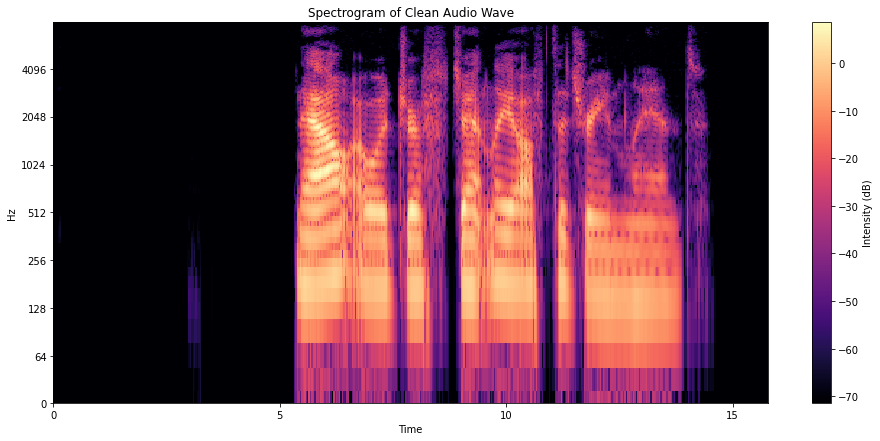

In [95]:
#plotting spectrogram of clean audio wave

n_fft = 512
hop_length = 128
win_length = 256
window = 'hann'

CleanSTFT = librosa.stft(Clean_Data, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window=window)
Clean_Data_db = librosa.amplitude_to_db(abs(CleanSTFT))


plt.figure(figsize=(16, 7))
librosa.display.specshow(Clean_Data_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(label="Intensity (dB)")
plt.title('Spectrogram of Clean Audio Wave')

# ***Perturbed Audio Analysis***

In [96]:
#Same code but passing the perturbed Audio Files
perturbed_audio_data = '/content/drive/MyDrive/Audio_Analysis/20db_perturbed.wav'
Perturbed_Data , SR = librosa.load(perturbed_audio_data)
print(Perturbed_Data,SR)

Perturbed_Data,SR = librosa.load(perturbed_audio_data, sr=None)

print(SR)


[0.00516441 0.0045442  0.00211573 ... 0.00155976 0.00119957 0.        ] 22050
16000


In [97]:
ipd.Audio(perturbed_audio_data)

# ***Distortion Metric Implementation from paper***


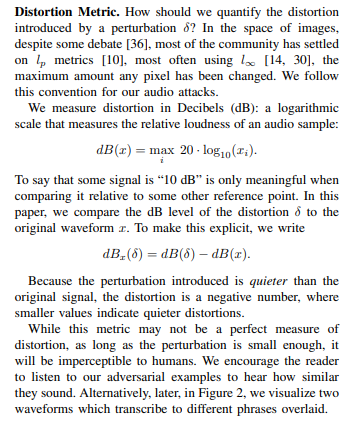

In [98]:
#Calulating SNR of Singal

def Metricsnr(original, noisy):
    original_power = 20 * np.log10(np.mean(original ** 2))
    noise_power = 20 * np.log10(np.mean((original - noisy) ** 2))
    snr = noise_power - original_power
    return snr

SNR=Metricsnr(Clean_Data,Perturbed_Data)
print("The SNR of signal is ", SNR)

The SNR of signal is  -25.085201263427734


Text(0.5, 1.0, '20dB Perturbed Audio Wave')

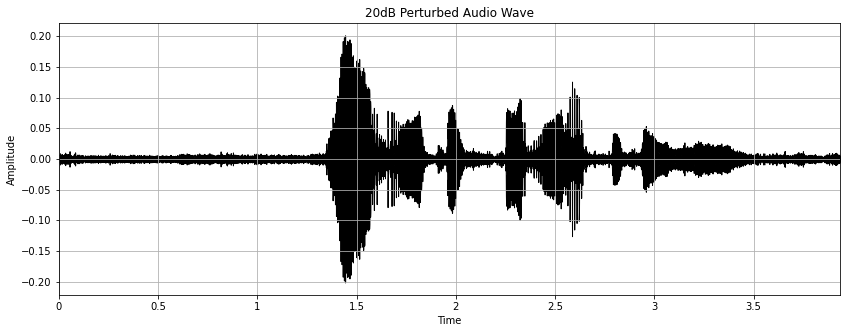

In [99]:
%matplotlib inline
plt.figure(figsize=(14, 5))
librosa.display.waveplot(Perturbed_Data, sr=SR, color="black")
plt.ylabel("Amplitude")
plt.grid()
plt.title('20dB Perturbed Audio Wave')

Text(0.5, 1.0, 'Spectrogram of 20dB Perturbed Audio Wave')

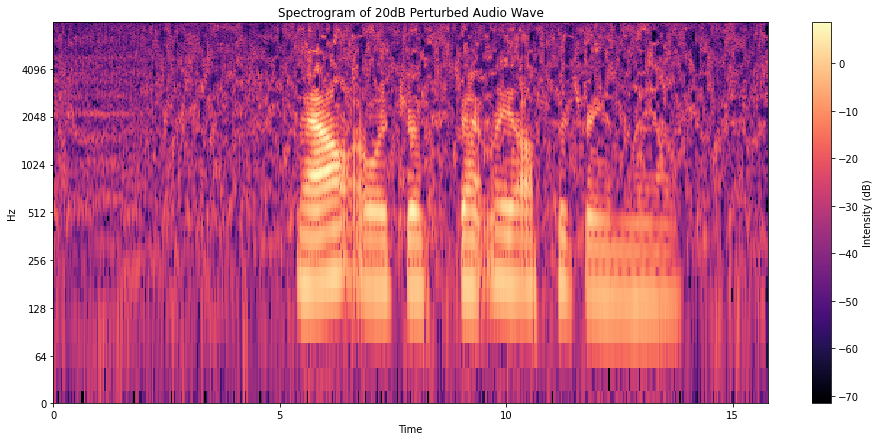

In [100]:
n_fft = 512
hop_length = 128
win_length = 256
window = 'hann'

PerturbedSTFT = librosa.stft(Perturbed_Data, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window=window)
Perturbed_Data_db = librosa.amplitude_to_db(abs(PerturbedSTFT))

plt.figure(figsize=(16, 7))
librosa.display.specshow(Perturbed_Data_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(label="Intensity (dB)")
plt.title('Spectrogram of 20dB Perturbed Audio Wave')

# ***Imperceptible Adversarial Attack Analysis***

Following cells executes the same code but this time its Carlini's "imperceptible" attack. The audio files are downloaded from his research paper referenced website (the very first 2 examples)
Link to his website: https://nicholas.carlini.com/code/audio_adversarial_examples

In [101]:
carlini_clean_audio_data = '/content/drive/MyDrive/Audio_Analysis/clean.wav'
cw , sr = librosa.load(carlini_clean_audio_data)
print(cw,sr)

cw,sr = librosa.load(carlini_clean_audio_data, sr=None)

print(sr)

[ 0.          0.          0.         ... -0.0276748  -0.02847217
  0.        ] 22050
16000


In [102]:
ipd.Audio(carlini_clean_audio_data)

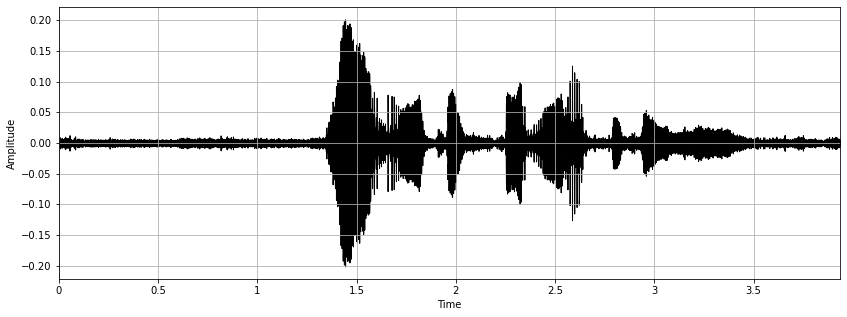

In [103]:
%matplotlib inline
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=SR, color="black")
plt.ylabel("Amplitude")
plt.grid()

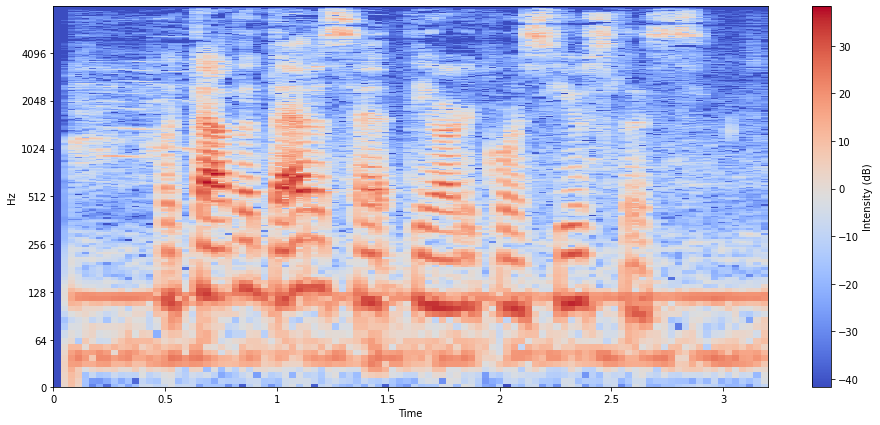

In [104]:
YCW = librosa.stft(cw)
Ydb = librosa.amplitude_to_db(abs(YCW))
plt.figure(figsize=(16, 7))
librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(label="Intensity (dB)")

In [105]:
carlini_perturbed_audio_data = '/content/drive/MyDrive/Audio_Analysis/perturbed.wav'
cwp , sr = librosa.load(carlini_perturbed_audio_data)
print(cwp,sr)

cwp,sr = librosa.load(carlini_perturbed_audio_data, sr=None)

print(sr)

[-0.00133227 -0.00256476 -0.00314685 ... -0.03087058 -0.02500104
  0.        ] 22050
16000


In [106]:
ipd.Audio(carlini_perturbed_audio_data)

In [107]:
def Metricsnr(original, noisy):
    original_power = 20 * np.log10(np.mean(original ** 2))
    noise_power = 20 * np.log10(np.mean((original - noisy) ** 2))
    snr = noise_power - original_power
    return snr
    
SNR=Metricsnr(cw,cwp)
print("The SNR of signal is ", SNR)

The SNR of signal is  -52.94031620025635


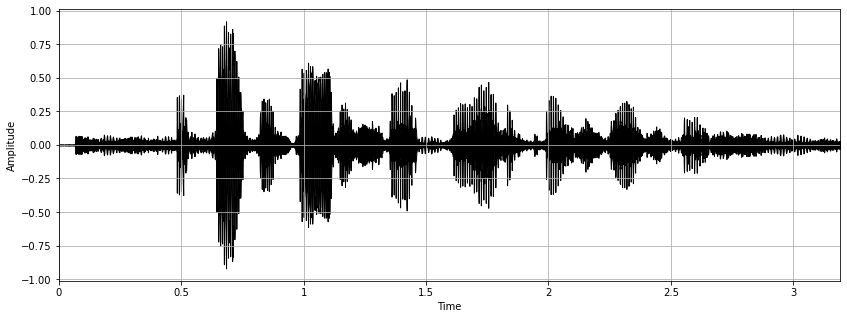

In [108]:
%matplotlib inline
plt.figure(figsize=(14, 5))
librosa.display.waveplot(cwp, sr=sr, color="black")
plt.ylabel("Amplitude")
plt.grid()

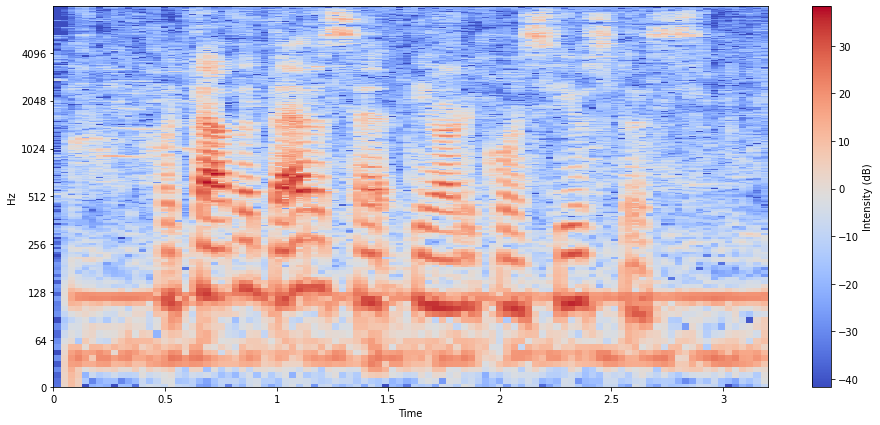

In [109]:
YCWP = librosa.stft(cwp)
YCWPdb = librosa.amplitude_to_db(abs(YCWP))
plt.figure(figsize=(16, 7))
librosa.display.specshow(YCWPdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(label="Intensity (dB)")